In [1]:
#https://www.kaggle.com/tejashvi14/medical-insurance-premium-prediction

In [29]:
# IMPORT LABRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme()
plt.style.use('ggplot')
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(15,12)
plt.rcParams['font.size']=15

In [30]:
data = pd.read_csv('Medicalpremium.csv')

In [31]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [32]:
data.corr()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


In [33]:
data.corr().loc['PremiumPrice','Age':'NumberOfMajorSurgeries']

Age                        0.697540
Diabetes                   0.076209
BloodPressureProblems      0.167097
AnyTransplants             0.289056
AnyChronicDiseases         0.208610
Height                     0.026910
Weight                     0.141507
KnownAllergies             0.012103
HistoryOfCancerInFamily    0.083139
NumberOfMajorSurgeries     0.264250
Name: PremiumPrice, dtype: float64

In [34]:
data.columns = data.columns.map(lambda x: x.lower())

In [35]:
data.columns

Index(['age', 'diabetes', 'bloodpressureproblems', 'anytransplants',
       'anychronicdiseases', 'height', 'weight', 'knownallergies',
       'historyofcancerinfamily', 'numberofmajorsurgeries', 'premiumprice'],
      dtype='object')

In [36]:
# changing currency from INR to SGD

exchange = 0.018

data.premiumprice = (data.premiumprice * exchange).astype(int)

### calculate Body Mass Index

In [37]:
# convert height in centimeters to meters
data['height']=data['height']/100

# compute BMI and assign to new column
data['bmi']=data['weight']/(data['height']**2)

In [38]:
data.head()

,age,diabetes,bloodpressureproblems,anytransplants,anychronicdiseases,height,weight,knownallergies,historyofcancerinfamily,numberofmajorsurgeries,premiumprice,bmi
0,45,0,0,0,0,1.55,57,0,0,0,449,23.725286
1,60,1,0,0,0,1.80,73,0,0,0,522,22.530864
2,36,1,1,0,0,1.58,59,0,0,1,413,23.634033
3,52,1,1,0,1,1.83,93,0,0,2,503,27.770313
4,38,0,0,0,1,1.66,88,0,0,1,413,31.934969


### EDA

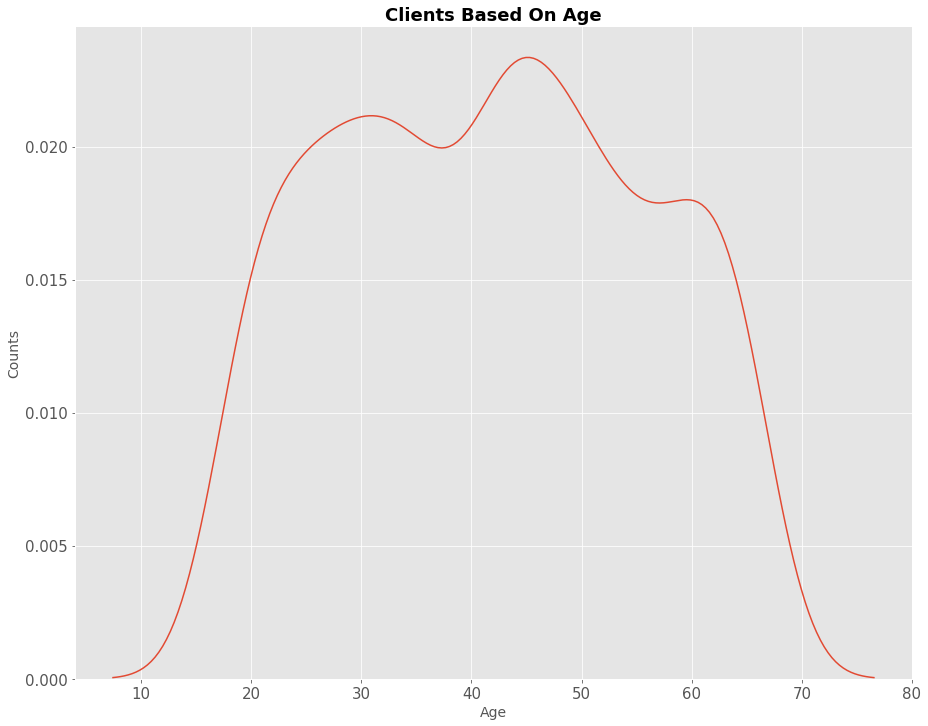

In [39]:
# plot premium price based on age

sns.kdeplot(data=data, x='age');
plt.title('Clients Based On Age', fontsize=18, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel('Counts', fontsize=14)

plt.show()

In [40]:
# computing obese rates.  Assign new column. 1 means obese, 0 means not obese

data['weight_status'] = data['bmi'].map(lambda x: 1 if x >= 32 else 0)

In [41]:
data.head()

,age,diabetes,bloodpressureproblems,anytransplants,anychronicdiseases,height,weight,knownallergies,historyofcancerinfamily,numberofmajorsurgeries,premiumprice,bmi,weight_status
0,45,0,0,0,0,1.55,57,0,0,0,449,23.725286,0
1,60,1,0,0,0,1.80,73,0,0,0,522,22.530864,0
2,36,1,1,0,0,1.58,59,0,0,1,413,23.634033,0
3,52,1,1,0,1,1.83,93,0,0,2,503,27.770313,0
4,38,0,0,0,1,1.66,88,0,0,1,413,31.934969,0


### Looking for business opportunities by segmentation

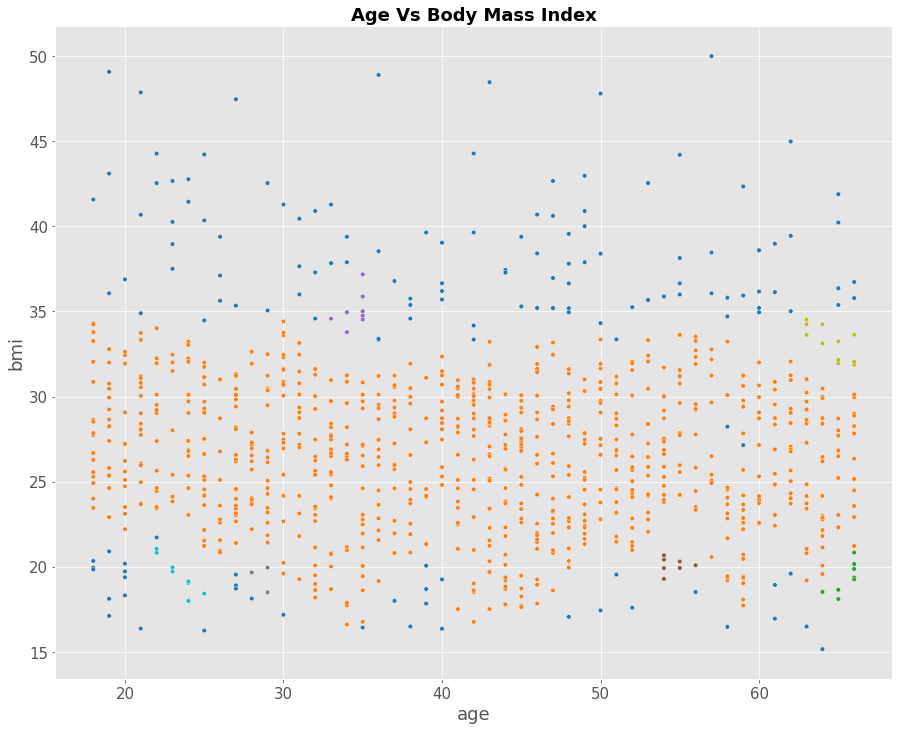

In [42]:
# clustering by DBSCAN, BMI vs Age

from sklearn.cluster import DBSCAN

X_age_bmi = data[['age','bmi']]

dbscan = DBSCAN(eps=1.5, min_samples=6).fit_predict(X_age_bmi)

sns.scatterplot(data=data, x='age', y='bmi', s=20, c=dbscan, cmap='tab10')
plt.title('Age Vs Body Mass Index', fontsize=18, fontweight='bold')

plt.show()

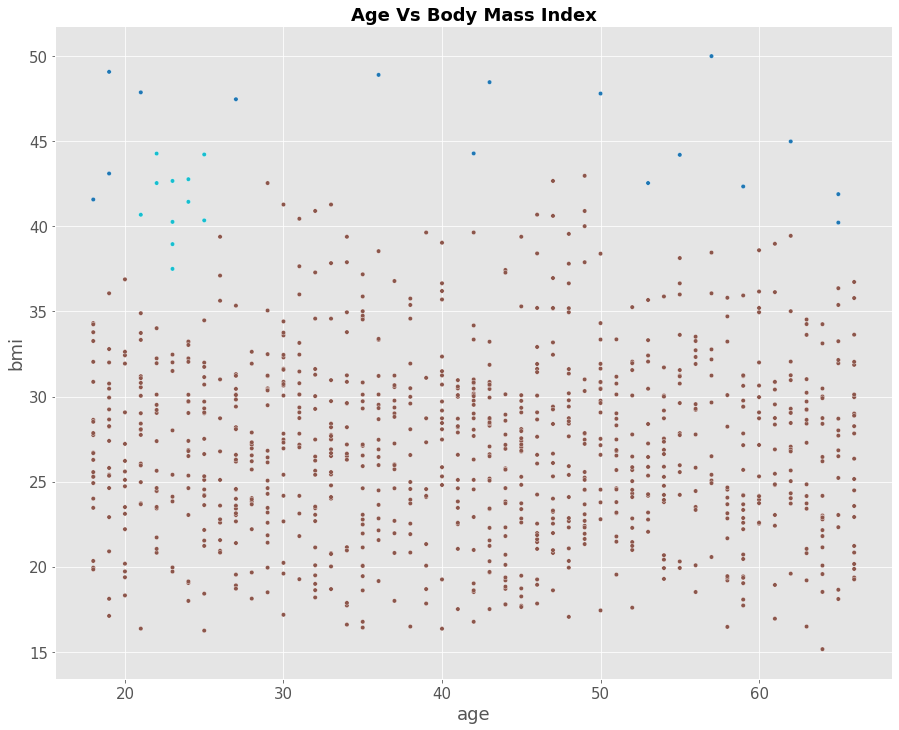

In [43]:
# clustering by DBSCAN, BMI vs Age

from sklearn.cluster import DBSCAN

X_age_bmi = data[['age','bmi']]

clf = DBSCAN(eps=3, min_samples=5)
dbscan = clf.fit_predict(X_age_bmi)
sns.scatterplot(data=data, x='age', y='bmi', s=20, c=dbscan, cmap='tab10')
plt.title('Age Vs Body Mass Index', fontsize=18, fontweight='bold')

plt.show()

In [44]:
unique_num = set(dbscan)
acc=[]

for i in unique_num:
    acc.append(i)
    
acc
    

[0, 1, -1]

In [45]:
# # clustering by KMeans

# from sklearn.cluster import KMeans

# kmeans = KMeans(3).fit_predict(X_age_bmi)

# sns.scatterplot(data=data, x='age', y='bmi', s=20, c=kmeans, cmap='tab10')
# plt.title('Age Vs Body Mass Index', fontsize=18, fontweight='bold')

# plt.show()

In [46]:
# # clustering by Gaussian Mixture

# from sklearn.mixture import GaussianMixture

# gm = GaussianMixture(3, random_state=1).fit_predict(X_age_bmi)

# sns.scatterplot(data=data, x='age', y='bmi', s=20, c=gm, cmap='tab10')
# plt.title('Age Vs Body Mass Index', fontsize=18, fontweight='bold')

# plt.show()

# Upsampling data to fix imbalanced data

In [47]:
# # data imbalance

# data.loc[data['bmi']>=32].shape[0], data.loc[data['bmi']<32].shape[0]

In [48]:
# test = pd.DataFrame({'gender': ['m','m','f','m','f','m','f','m'], 'age': [62,56,34,65,78,23,45,41], 'pain':\
#                     ['Y','N','N','Y','N','Y','N','N']})
# test

In [49]:
#pip install -U imbalanced-learn

In [50]:
#from imblearn.over_sampling import SMOTE

In [51]:
data.head()

,age,diabetes,bloodpressureproblems,anytransplants,anychronicdiseases,height,weight,knownallergies,historyofcancerinfamily,numberofmajorsurgeries,premiumprice,bmi,weight_status
0,45,0,0,0,0,1.55,57,0,0,0,449,23.725286,0
1,60,1,0,0,0,1.80,73,0,0,0,522,22.530864,0
2,36,1,1,0,0,1.58,59,0,0,1,413,23.634033,0
3,52,1,1,0,1,1.83,93,0,0,2,503,27.770313,0
4,38,0,0,0,1,1.66,88,0,0,1,413,31.934969,0


# Splitting data for training and testing

In [52]:
# # assigning x & y values

# X = data.drop('weight_status', axis=1)
# y = data.weight_status

In [53]:
# X.shape, y.shape

In [54]:
# upsample = SMOTE()
# data_resampled, y = upsample.fit_resample(X,y)

In [55]:
# y.value_counts(), X.shape

In [56]:
# data_resampled.head()

In [57]:
# visualization of bmi vs age after SMOTE oversampling

#sns.scatterplot(data=data_resampled, x='age', y='bmi');

In [58]:
# # compute sales volume for premium price between $300 and $400

# requiremt = (data['premiumprice']>300) &  (data['premiumprice']<400)

# sales_300_400 = data[requiremt]['premiumprice'].sum()
# sales_remainder = data['premiumprice'].sum() - sales_300_400

# label = 'All Other Sales','Sales From Premium Price Between SGD300 & SGD400'
# plt.pie([sales_remainder,sales_300_400], labels=label, autopct= '%1.1f%%')
# plt.title('Comparing Sales From Premium Price Between SGD300 & SGD400, and the rest')


# plt.show()

In [59]:
# # statistics of premium price between $300 and $400

# data[requiremt].describe()

In [60]:
# # visualize age distribution 

# age_anytransplant = data[data['anytransplants']>=1]
# age_anychronicdiseases = data[data['anychronicdiseases']>=1]
# age_knownallergies = data[data['knownallergies']>=1]
# age_historyofcancerinfamily = data[data['historyofcancerinfamily']>=1]
# age_numberofmajorsurgeries = data[data['numberofmajorsurgeries']>=1]

# my_list = [age_anytransplant,age_anychronicdiseases, age_knownallergies, age_historyofcancerinfamily,\
#           age_numberofmajorsurgeries]

# title_list = ['Transplants','Chronic Diseases','Known Allergies',\
#              'History Of Cancer In The Family','Number Of Major Surgeries']
# plt.figure(figsize=(18,20))
# h=1
# for m, t in zip(my_list, title_list):
#     plt.subplot(3,2,h)
#     sns.kdeplot(data=m, x= 'age')
#     plt.title(f"Age By Who Has {t}", fontsize=16)
#     plt.xlabel("Age", fontsize=14)
#     plt.ylabel('Count', fontsize=14)
#     h+=1

# plt.show()

# Train the data

In [61]:
# assigning x & y values

# X_smote = data_resampled.drop(['premiumprice','height','weight'], axis=1)
# y_smote = data_resampled.premiumprice

X = data.drop(['premiumprice','height','weight','weight_status'], axis=1)
y = data.premiumprice

In [62]:
# import train test split

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)

### Determine the most suitable regression model

In [63]:
# import regression libraries and initialize

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

lm = LinearRegression()
lasso = linear_model.Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
dtr = DecisionTreeRegressor(random_state=1)
sm = SVR(C=1.0, epsilon=0.2)
ada = AdaBoostRegressor()
regr = RandomForestRegressor(max_depth=2, random_state=0)
bay = linear_model.BayesianRidge()

In [64]:
# define function to return the r2 score and RMSE of prediction

def predict_score(model, X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)
    #obese = X_train[X_train['bmi']>=32].shape[0]
    #non_obese = X_train[X_train['bmi']<32].shape[0]
    #ratio_obese_nonObese = obese/non_obese
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    sse = sum((y_test - y_predict)**2)  # sum of square error
    rmse = np.sqrt(sse/len(y_test)) # squart root of the mean of squared errors
    return round(model.score(X, y),2), round((rmse),2)
    

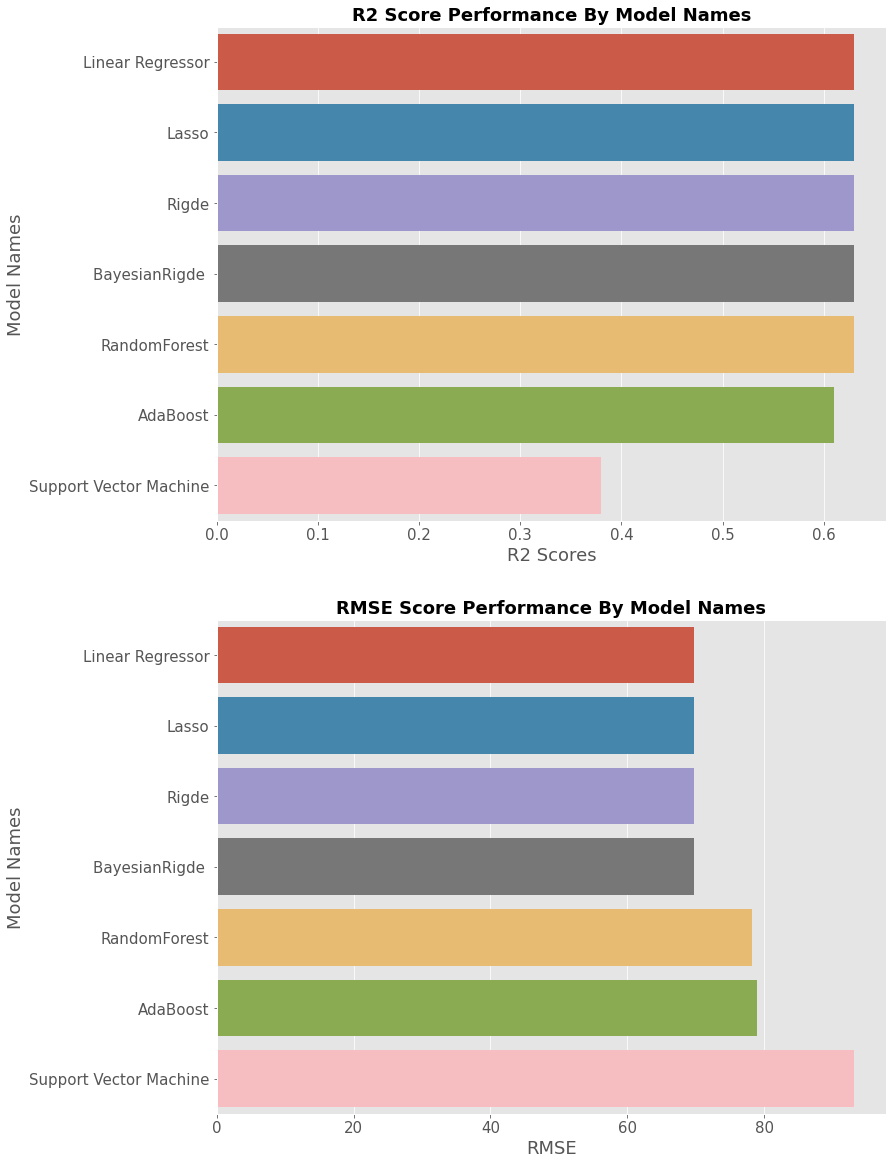

Score Performance Table 



,Model Names,R2 Scores,RMSE
0,Linear Regressor,0.63,69.68
1,Lasso,0.63,69.68
2,Rigde,0.63,69.68
5,BayesianRigde,0.63,69.74
6,RandomForest,0.63,78.21
4,AdaBoost,0.61,78.99
3,Support Vector Machine,0.38,93.13


In [65]:
# visualize R2 score performance of regressor models

models = [lm,lasso, ridge, sm, ada, bay, regr]
model_names = ['Linear Regressor','Lasso','Rigde','Support Vector Machine', 'AdaBoost', 'BayesianRigde ', 'RandomForest' ]

add = []
for m, mn in zip(models, model_names):
    scores, rmse = predict_score(m, X,y) 
    cast = {'Model Names': mn, 'R2 Scores': scores, 'RMSE': rmse} # cast a dictionary to capture the values
    add.append(cast) # append the values
model_scores = pd.DataFrame(data=add, columns=['Model Names','R2 Scores','RMSE'])
order = model_scores.sort_values('RMSE', ascending=True)['Model Names'] # sort the values

plt.figure(figsize=(12,20))


# plot the graphs

h=1
plt.subplot(2,1,h)
sns.barplot(data=model_scores, x='R2 Scores', y= 'Model Names', order=order)
plt.title('R2 Score Performance By Model Names', fontsize=18, fontweight='bold')

h+=1
plt.subplot(2,1,h)
order = model_scores.sort_values('RMSE', ascending=True)['Model Names']
sns.barplot(data=model_scores, x='RMSE', y= 'Model Names', order=order)
plt.title('RMSE Score Performance By Model Names', fontsize=18, fontweight='bold')


plt.show()

#print(f"The ratio of obese to non-obese is {ratio_obese_nonObese:.2f}")
print("Score Performance Table \n")
model_scores.sort_values('R2 Scores', ascending=False)


# After fixing imbalance data regarding bmi values

In [66]:
# # visualize R2 score performance of regressor models

# models = [lm,lasso, ridge, sm, ada, bay, regr]
# model_names = ['Linear Regressor','Lasso','Rigde','Support Vector Machine', 'AdaBoost', 'BayesianRigde ', 'RandomForest' ]

# add = []
# for m, mn in zip(models, model_names):
#     scores, rmse, ratio_obese_nonObese = predict_score(m, X_smote,y_smote) # using smote data
#     cast = {'Model Names': mn, 'R2 Scores': scores, 'RMSE': rmse} # cast a dictionary to capture the values
#     add.append(cast) # append the values
# model_scores = pd.DataFrame(data=add, columns=['Model Names','R2 Scores','RMSE'])
# order = model_scores.sort_values('RMSE', ascending=True)['Model Names'] # sort the values

# plt.figure(figsize=(12,20))


# # plot the graphs

# h=1
# plt.subplot(2,1,h)
# sns.barplot(data=model_scores, x='R2 Scores', y= 'Model Names', order=order)
# plt.title('R2 Score Performance By Model Names', fontsize=18, fontweight='bold')

# h+=1
# plt.subplot(2,1,h)
# order = model_scores.sort_values('RMSE', ascending=True)['Model Names']
# sns.barplot(data=model_scores, x='RMSE', y= 'Model Names', order=order)
# plt.title('RMSE Score Performance By Model Names', fontsize=18, fontweight='bold')


# plt.show()

# print(f"The ratio of obese to non-obese is {ratio_obese_nonObese:.0f}")
# print("Score Performance Table \n")
# model_scores.sort_values('R2 Scores', ascending=False)


In [67]:
#sns.scatterplot(data=data_resampled, x='age', y='bmi');

### Find out the order of importance of all 10 features

In [68]:
# rank the importance of each features

from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(X,y)
importance = clf.feature_importances_
importance

array([0.45566873, 0.02581808, 0.0242875 , 0.03903369, 0.05216068,
       0.02478751, 0.03467527, 0.1519819 , 0.19158664])

In [69]:
# compute the importance and fill in dataframe

add = []

for cols, impt in zip(X.columns, importance):
    cast = {'features': cols, 'importance': impt}
    add.append(cast)
feature_importance = pd.DataFrame(data=add, columns=['features','importance'])
feature_importance

,features,importance
0,age,0.455669
1,diabetes,0.025818
2,bloodpressureproblems,0.024287
3,anytransplants,0.039034
4,anychronicdiseases,0.052161
5,knownallergies,0.024788
6,historyofcancerinfamily,0.034675
7,numberofmajorsurgeries,0.151982
8,bmi,0.191587


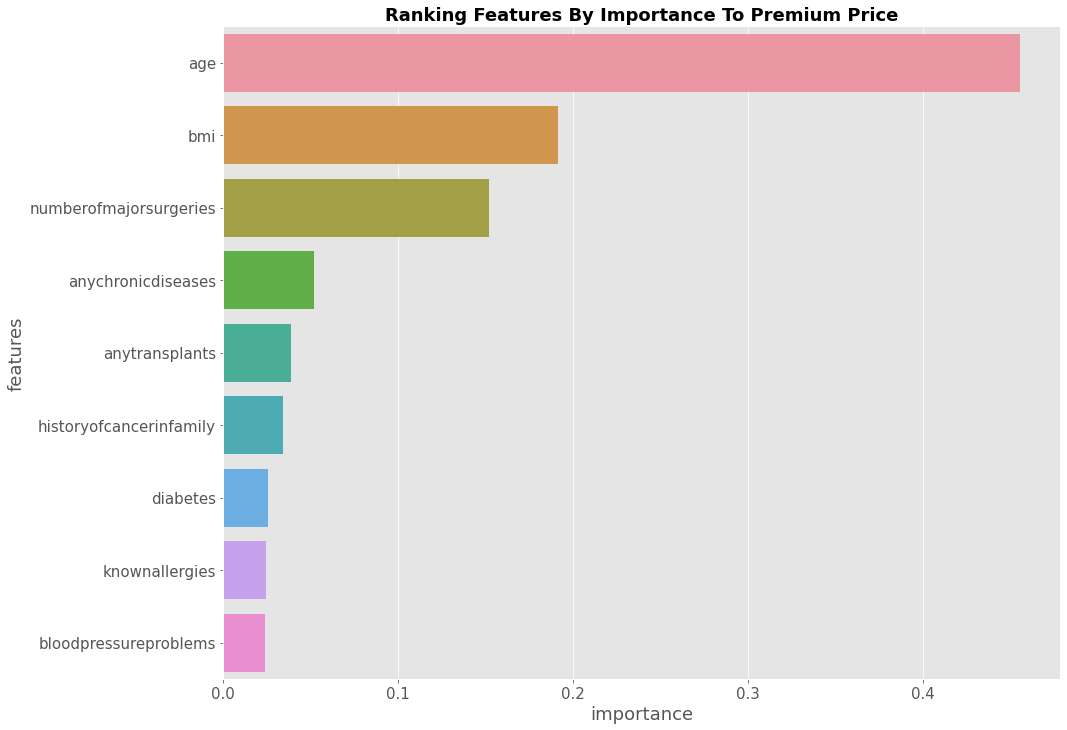

In [70]:
# visualize by importance

plt.figure(figsize=(15,12))
order = feature_importance.sort_values('importance', ascending=False).features
sns.barplot(data=feature_importance, x= 'importance', y='features', order=order)
plt.title('Ranking Features By Importance To Premium Price', fontsize=18, fontweight='bold')

plt.show()

### Extract mean and standard deviation to compute prediction interval

In [71]:
# extract mean and standard deviation

mean_std = X.describe().loc[['mean','std'],:]

# transpose

mean_std = mean_std.T

# renaming columns

mean_std = mean_std.reset_index().rename(columns={'index':'features'})

In [72]:
mean_std

,features,mean,std
0,age,41.745436,13.963371
1,diabetes,0.419878,0.493789
2,bloodpressureproblems,0.468560,0.499264
3,anytransplants,0.055781,0.229615
4,anychronicdiseases,0.180527,0.384821
5,knownallergies,0.215010,0.411038
6,historyofcancerinfamily,0.117647,0.322353
7,numberofmajorsurgeries,0.667343,0.749205
8,bmi,27.460709,5.878671


In [73]:
# adding a new column

# set index for features

mean_std['impact'] = feature_importance['importance']

mean_std.set_index('features', inplace=True)

In [74]:
# review

mean_std

,mean,std,impact
features,,,
age,41.745436,13.963371,0.455669
diabetes,0.419878,0.493789,0.025818
bloodpressureproblems,0.468560,0.499264,0.024287
anytransplants,0.055781,0.229615,0.039034
anychronicdiseases,0.180527,0.384821,0.052161
knownallergies,0.215010,0.411038,0.024788
historyofcancerinfamily,0.117647,0.322353,0.034675
numberofmajorsurgeries,0.667343,0.749205,0.151982
bmi,27.460709,5.878671,0.191587


In [75]:
# def a function to output weighted z score and plot graph


def weighted_z_score(x_input):
    wt_z_score = []
    for f, i in zip(mean_std.index, x_input):
        result = (((i - mean_std.loc[f,'mean'])/mean_std.loc[f,'std'])*mean_std.loc[f,'impact'])
        wt_z_score.append(result)
    z = wt_z_score
    sum_z = sum(z)
    wt_z_score = 0
    plt.figure(figsize=(12,8), dpi=200)
    sns.barplot(z, X.columns, order=order, palette='rocket');
    plt.title('Comparison Relative To Averages', fontsize=18, fontweight='bold')
    plt.xlabel('Weighted Z Score', fontsize=15, fontweight='bold')
    plt.ylabel('Characteristics', fontsize=15, fontweight='bold')
    print(f"Age : {x_input[0].astype(int)}")
    
    
    # compute category for weighted_z_score
    if sum_z <= -0.3:
        print(f"Overall Health: Excellent")
        print(f"Health Score: {sum_z:.1f}")

    elif sum_z > -0.3 and sum_z <= 0.2:
        print(f"Overall Health: Good")
        print(f"Health Score: {sum_z:.1f}")

    elif sum_z > 0.2 and sum_z <= 0.4:
        print(f"Overall Health: Room For Improvement")
        print(f"Health Score: {sum_z:.1f}")

    else:
        print(f"Overall Health: Danger")
        print(f"Health Score: {sum_z:.1f}")

    
    # compute category for obesity
    a = x_input[8]
    if a < 18.5:
        print(f"BMI: {a:.1f}, Underweight")
    elif a >= 18.5 and a <=24.9:
        print(f"BMI: {a:.1f}, Normal")
    elif a >=25 and a <=29.9:
        print(f"BMI: {a:.1f}, Overweight")
    elif a >=30 and a <= 34.9:
        print(f"BMI: {a:.1f}, Obese")
    else:  
        print(f"BMI: {a:.1f}, Extremely Obese")

    return sum_z

In [76]:
# def a function to output premium price with prediction interval and visualization

premium_over = 1.03

def premiumprice_linear(model,X,y, x_input):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    x_in = np.array(x_input).reshape(-1,len(x_input))
    y_hat = lm.predict(x_in) # prediction for one person
    y_hat = (y_hat * premium_over).astype(int) # adding a premium to original price
    for k in y_hat:
        y_hat = k
    sum_z = weighted_z_score(x_input)
    interval = (sum_z * rmse).astype(int) # call function for weighted z score
    interval_1 = abs(interval).astype(int)
    
    # define limit for pricing, convert array to integer
    lower = (y_hat - interval_1).astype(int) # pricing flexibility by RMSE score and weight z score
    higher = (y_hat + interval_1).astype(int) # pricing flexibility by RMSE score and weight z score
    lowest = (y_hat - (1.96*rmse)).astype(int) # pricing flexibility by RMSE score
    highest = (y_hat + (1.96*rmse)).astype(int) # pricing flexibility by RMSE score

    minimum = 270
    
    
    if lower <= minimum:
        print(f"Premium price: ${minimum}")
    
    elif sum_z <= -0.3:
            print(f"Premium price: ${lower:.0f}")
            print(f"Lower limit: ${minimum}")
            print(f"Upper limit: ${y_hat:.0f}")
            
       
    elif sum_z > -0.3 and sum_z <= 0.2:
            print(f"Premium price: ${y_hat:.0f}")
            print(f"Lower limit: ${lower:.0f}")
            print(f"Upper limit: ${higher:.0f}")
            
            
    elif sum_z > 0.2 and sum_z <= 0.4:
            print(f"Premium price: ${higher:.0f}")
            print(f"Lower limit: ${y_hat:.0f}")
            print(f"Upper limit: ${highest:.0f}")

    else:
        print(f"Premium price: ${y_hat:.0f}")
        print(f"Lower limit: ${lower:.0f}")
        print(f"Upper limit: ${higher:.0f}")



        
        


### Use Linear Regression to forecast Premium Price with lower or upper limit recommendation

In [77]:
# testing....

john = (X.loc[3,:]) 
sally = (X.loc[79,:])
sam = (X.loc[888,:])
jude = (X.loc[945,:])
ken = (X.loc[300,:])
tom = (X.loc[903,:])
nancy = X.loc[7,:]

Age : 55
Overall Health: Room For Improvement
Health Score: 0.3
BMI: 29.6, Overweight
Premium price: $541
Lower limit: $521
Upper limit: $674


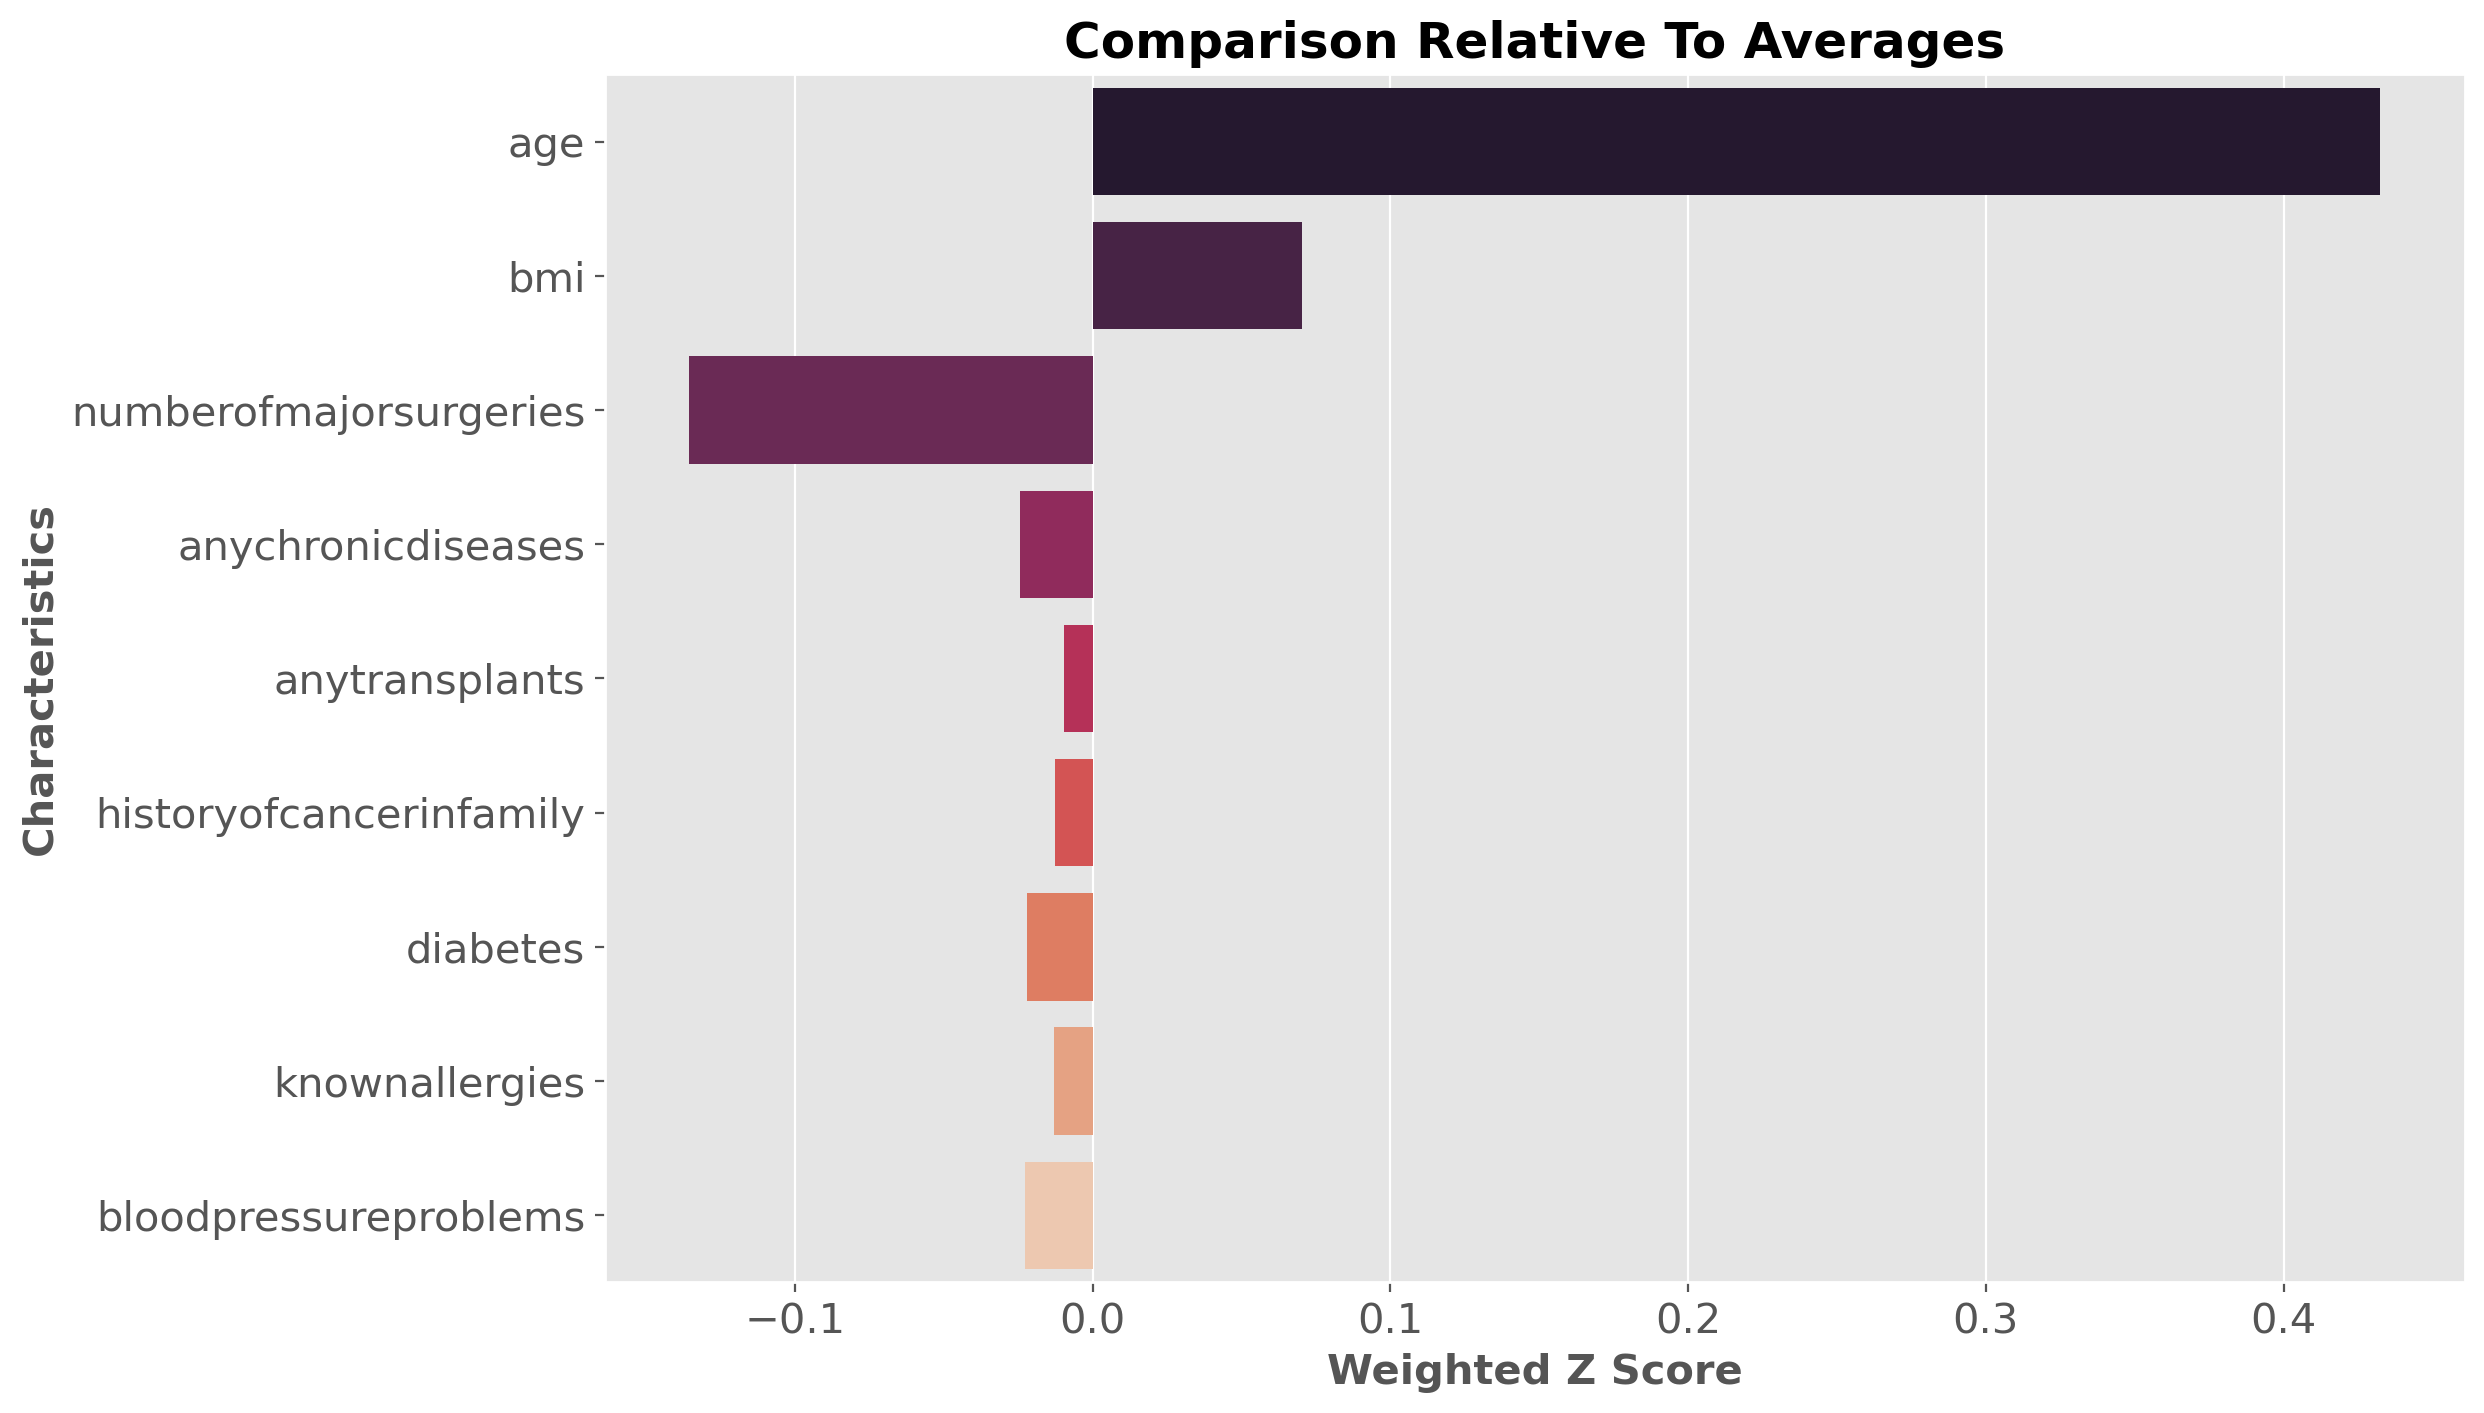

In [78]:
premiumprice_linear(lm,X,y, jude)

Age : 52
Overall Health: Danger
Health Score: 0.7
BMI: 27.8, Overweight
Premium price: $525
Lower limit: $467
Upper limit: $583


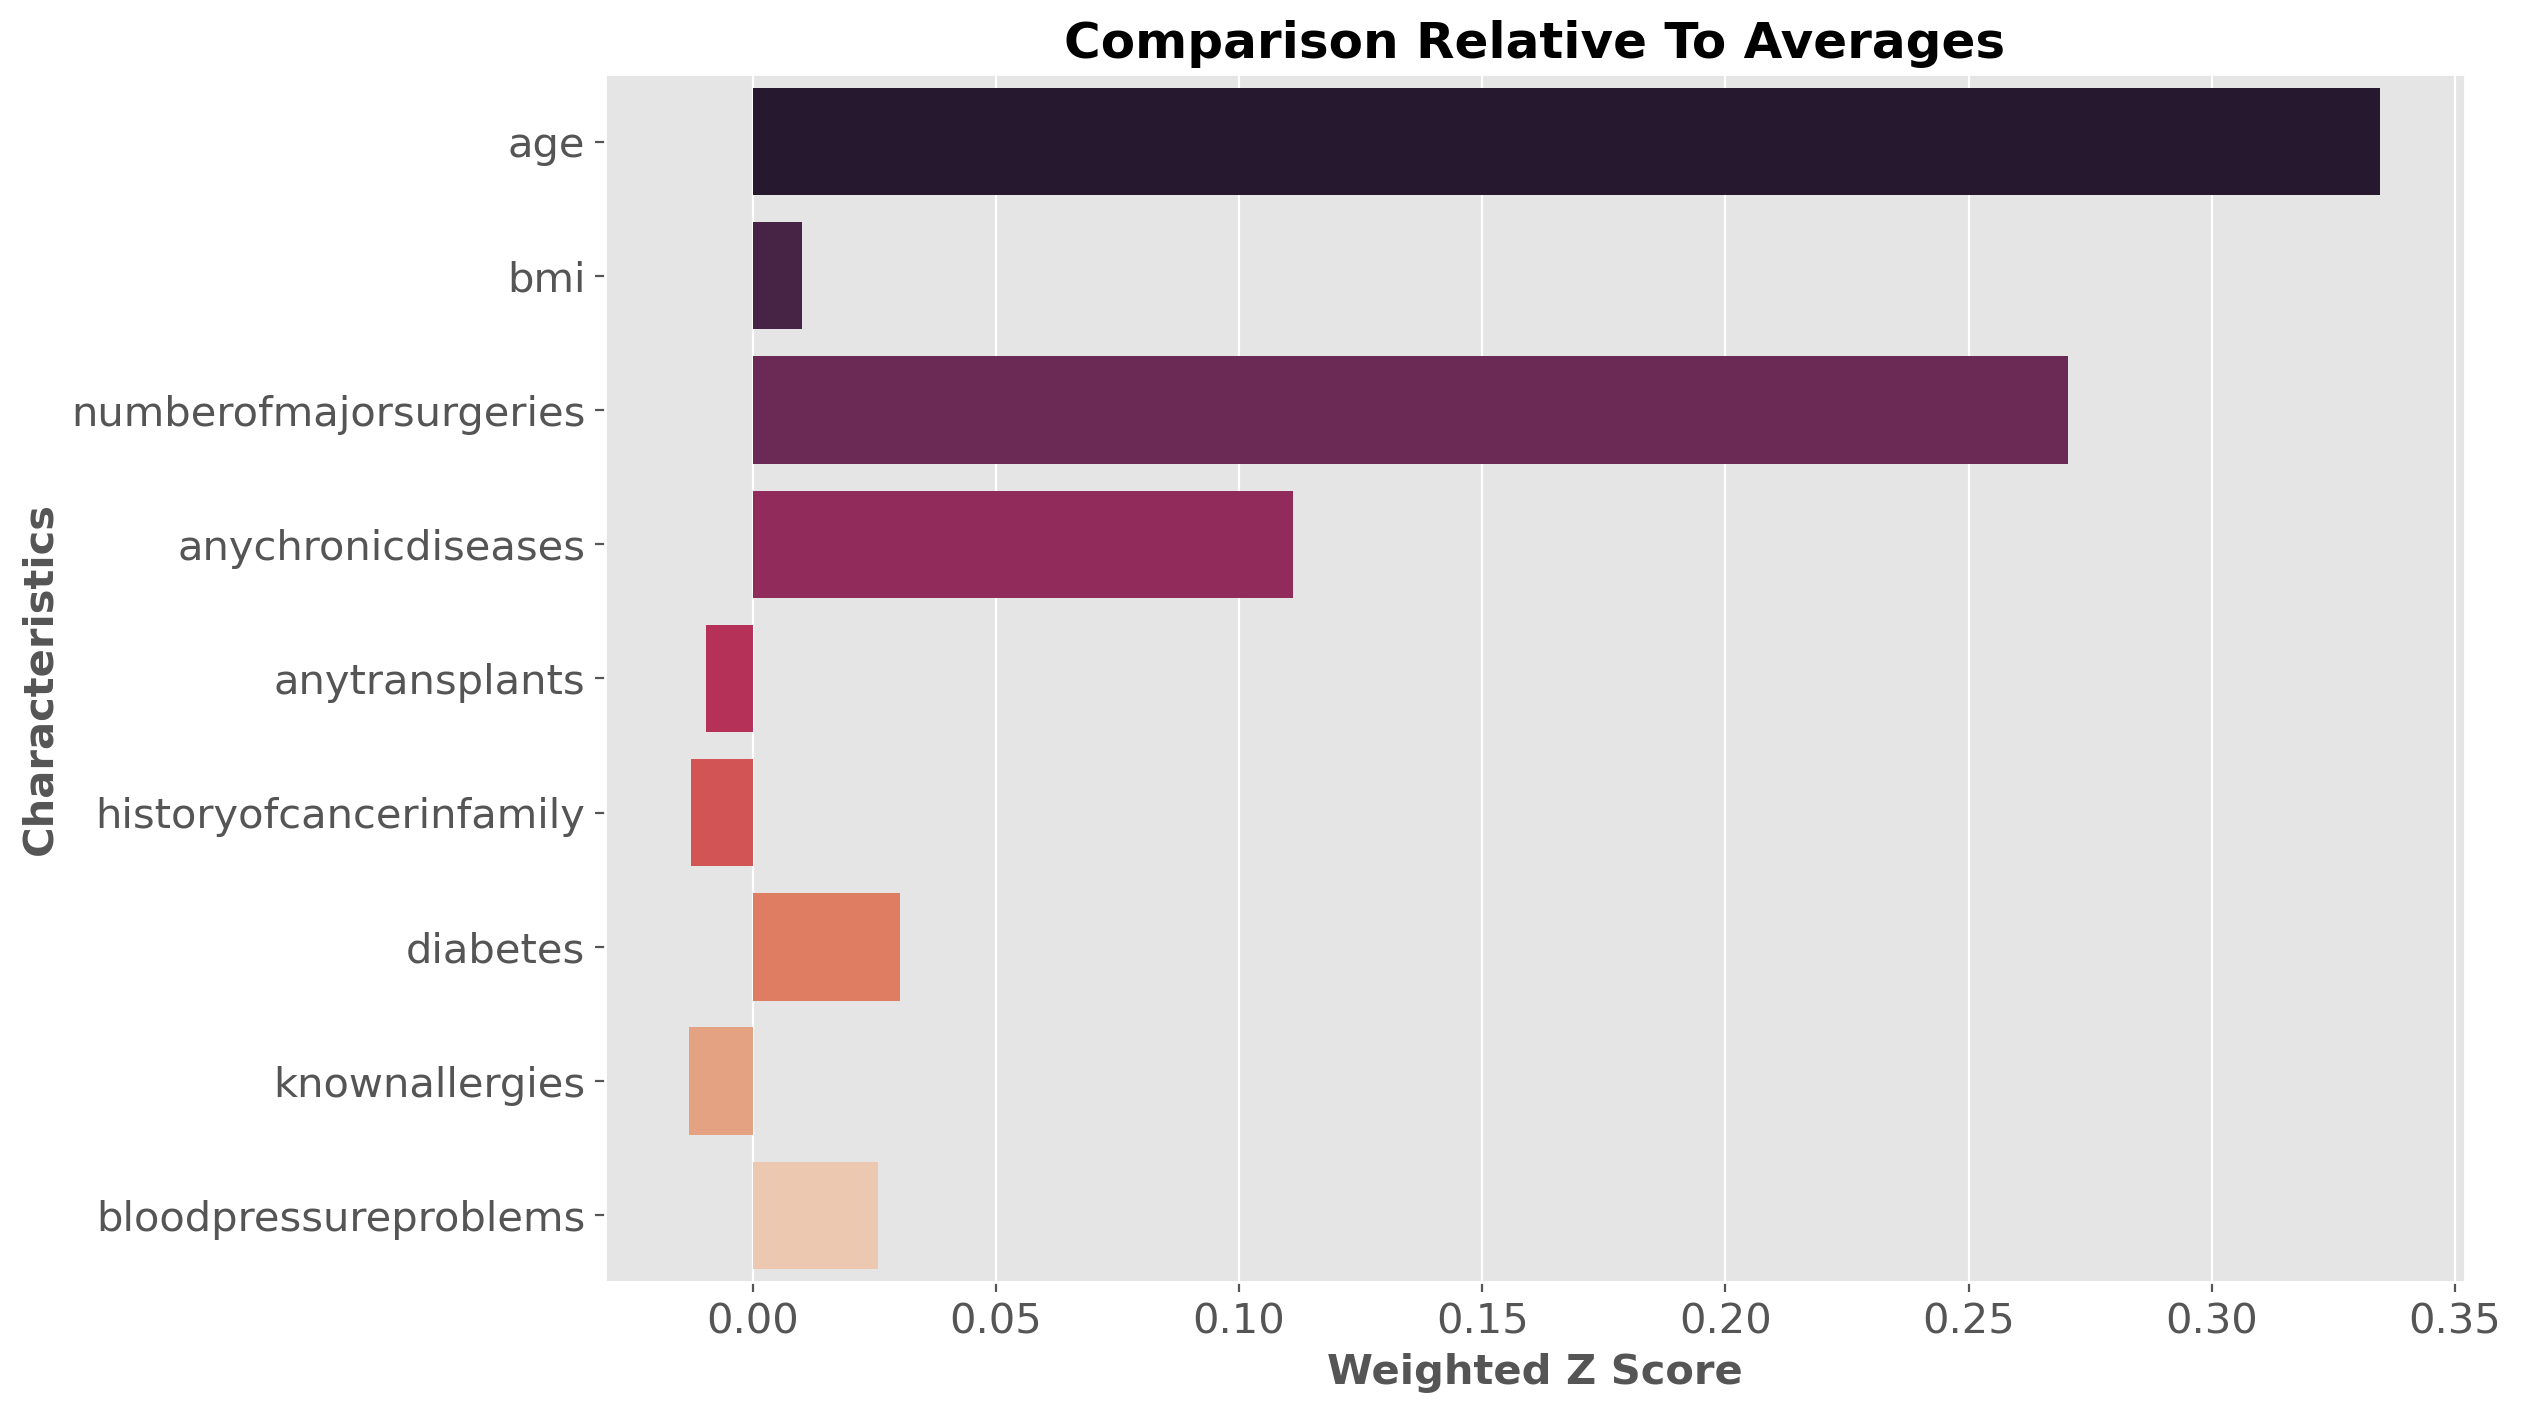

In [79]:
premiumprice_linear(lm,X,y, john)

In [80]:
# # market potential 

# require = (data['numberofmajorsurgeries']==0) & (data['anychronicdiseases']==0) & (data['anytransplants']==0) & \
# (data['historyofcancerinfamily']==0) & (data['knownallergies']==0) & (data['bmi']<32)

# healthy = data[require].premiumprice.sum()
# unhealthy = data.premiumprice.sum() - healthy

In [81]:
# value =['Revenue $103,602', 'Revenue $327,803']
# plt.pie([healthy,unhealthy], labels = value , autopct= '%1.1f%%');
# plt.legend(['No serious health issues','Serious health issues'], loc=4)
# plt.title('Clients Who Has Serious Health Issues VS No serious health issues')

# plt.show()

# Use linear model for price model

In [82]:
# define function to output weight z score for every client

def weighted_z_score_modeling(x_input):
    wt_z_score = []
    for f, i in zip(mean_std.index, x_input):
        result = (((i - mean_std.loc[f,'mean'])/mean_std.loc[f,'std'])*mean_std.loc[f,'impact'])
        wt_z_score.append(result)
    z = wt_z_score
    sum_z = sum(z)
    wt_z_score = 0

    return sum_z

In [83]:
# define function to output price based on weighted z score and rmse

premium_over = 1

def premiumprice_model_linear_weighted(model,X,y, x_input):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #sse = sum((y-y_pred)**2)  # sum of square error
    #rmse = np.sqrt(sse/len(y)) # standard deviation of y values to y predictions (RMSE)
    x_in = np.array(x_input).reshape(-1,len(x_input))
    y_hat = lm.predict(x_in) # prediction for one person
    y_hat = (y_hat * premium_over).astype(int) # adding a premium to original price
    for k in y_hat:
        y_hat = k
    sum_z = weighted_z_score_modeling(x_input)
    interval = (sum_z * rmse).astype(int) # call function for weighted z score
    interval_1 = abs(interval).astype(int)
    
    # define limit for pricing, convert array to integer
    lower = (y_hat - interval_1).astype(int) # pricing flexibility by RMSE score and weight z score
    higher = (y_hat + interval_1).astype(int) # pricing flexibility by RMSE score and weight z score

    minimum = 270
    
    if lower <= minimum:
        return minimum
    
    elif sum_z <= -0.3:
        return lower
    
    
    elif sum_z > -0.3 and sum_z <= 0.2:
            return y_hat
       
    elif sum_z > 0.2 and sum_z <= 0.4:
            return higher        

    else:
        return y_hat


In [84]:
# define function to out price 

# define function to output price based on weighted z score and rmse

premium_over = 1

def premiumprice_model_linear(model,X,y, x_input):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #sse = sum((y-y_pred)**2)  # sum of square error
    #rmse = np.sqrt(sse/len(y)) # standard deviation of y values to y predictions (RMSE)
    x_in = np.array(x_input).reshape(-1,len(x_input))
    y_hat = lm.predict(x_in) # prediction for one person
    y_hat = (y_hat * premium_over).astype(int) # adding a premium to original price
    for k in y_hat:
        y_hat = k
    sum_z = weighted_z_score_modeling(x_input)
    interval = (sum_z * rmse).astype(int) # call function for weighted z score
    interval_1 = abs(interval).astype(int)
    
    # define limit for pricing, convert array to integer
    lower = (y_hat - interval_1).astype(int) # pricing flexibility by RMSE score and weight z score
    higher = (y_hat + interval_1).astype(int) # pricing flexibility by RMSE score and weight z score

    minimum = 270
    
    if y_hat <= minimum:
        return minimum
    else:
        return y_hat

In [85]:
# assign price to new column

acc=[]
for i in range(X.shape[0]):
    acc.append(premiumprice_model_linear(lm,X,y, X.loc[i,:]))
data['price_model_linear'] = acc

In [86]:
# assign price to new column

acc=[]
for i in range(X.shape[0]):
    acc.append(premiumprice_model_linear_weighted(lm,X,y, X.loc[i,:]))
data['price_model_linear_weighted'] = acc

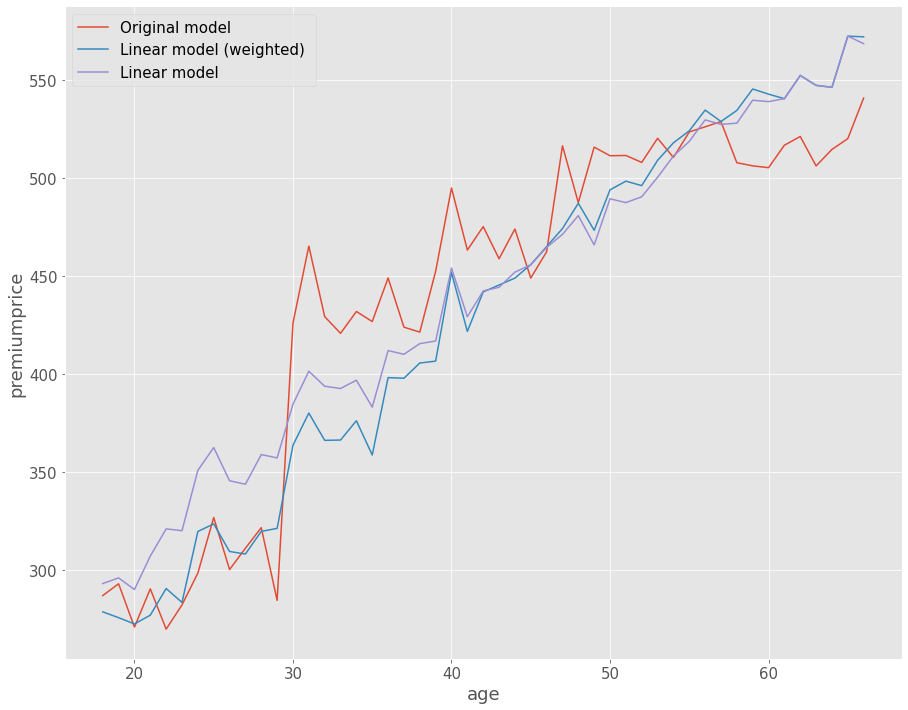

In [87]:
# model 3 follows closely behind Original model which was computed manually, model 2 is a new linear model

sns.lineplot(data=data, x='age', y='premiumprice', palette='bright', ci=None)
sns.lineplot(data=data, x='age', y='price_model_linear_weighted', palette='bright',ci=None)
#sns.lineplot(data=data, x='age', y='price_model_knn', palette='bright', ci=None)
sns.lineplot(data=data, x='age', y='price_model_linear', palette='bright',ci=None )
#sns.lineplot(data=data, x='age', y='price_model_randomforest', palette='bright', ci=None)
plt.legend(['Original model','Linear model (weighted) ','Linear model'])
plt.show()

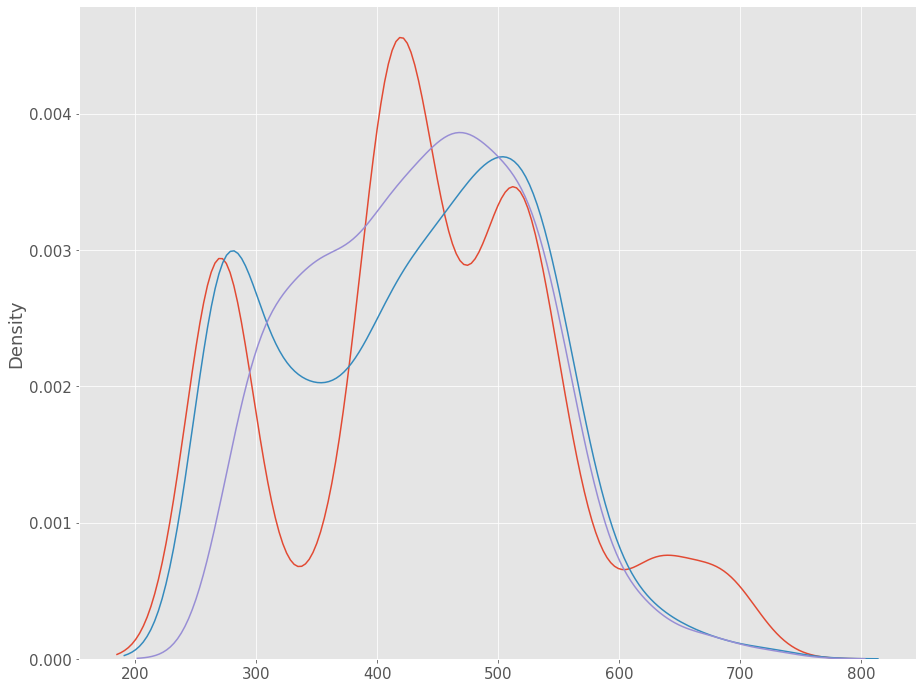

In [88]:
# visualize

sns.kdeplot(data=data, x='premiumprice')
#sns.kdeplot(data=data, x='price_model')
sns.kdeplot(data=data, x='price_model_linear_weighted')
sns.kdeplot(data=data, x='price_model_linear')
plt.xlabel('')
plt.show()

# Use classification for price prediction to follow current price model

In [89]:
# use pd.cut to classify prices in bins

data['price_model_class'] = pd.cut(data['premiumprice'], bins=[0, 270,324, 377, 413,467, 503, 558,630,702,800], \
                                   labels = [0,1,2,3,4,5,6,7,8,9])

In [90]:
data.head()

,age,diabetes,bloodpressureproblems,anytransplants,anychronicdiseases,height,weight,knownallergies,historyofcancerinfamily,numberofmajorsurgeries,premiumprice,bmi,weight_status,price_model_linear,price_model_linear_weighted,price_model_class
0,45,0,0,0,0,1.55,57,0,0,0,449,23.725286,0,431,431,4
1,60,1,0,0,0,1.80,73,0,0,0,522,22.530864,0,507,526,6
2,36,1,1,0,0,1.58,59,0,0,1,413,23.634033,0,367,367,3
3,52,1,1,0,1,1.83,93,0,0,2,503,27.770313,0,510,510,5
4,38,0,0,0,1,1.66,88,0,0,1,413,31.934969,0,448,448,3


# fix imbalance data 

In [91]:
from sklearn.utils import resample,shuffle
max = data.price_model_class.value_counts().max()
acc = []
for i in np.arange(10):
    df = data[data['price_model_class']==i]
    acc.append(resample(df,random_state=1, n_samples=max, replace=True))
data_resampled = pd.concat(acc)
data_resampled

,age,diabetes,bloodpressureproblems,anytransplants,anychronicdiseases,height,weight,knownallergies,historyofcancerinfamily,numberofmajorsurgeries,premiumprice,bmi,weight_status,price_model_linear,price_model_linear_weighted,price_model_class
174,24,1,0,0,0,1.78,73,0,0,1,270,23.040020,0,286,270,0
745,24,1,1,0,0,1.66,80,0,0,0,270,29.031790,0,319,270,0
382,19,0,0,0,0,1.64,97,0,0,0,270,36.064842,1,309,270,0
739,25,0,1,0,0,1.70,84,1,1,1,270,29.065744,0,371,347,0
706,29,0,0,0,0,1.63,60,0,0,0,270,22.582709,0,333,270,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,64,1,1,0,1,1.63,91,0,0,2,720,34.250442,1,598,598,9
295,64,1,1,0,1,1.63,91,0,0,2,720,34.250442,1,598,598,9
295,64,1,1,0,1,1.63,91,0,0,2,720,34.250442,1,598,598,9
295,64,1,1,0,1,1.63,91,0,0,2,720,34.250442,1,598,598,9


In [92]:
# accumulate price predictions

labels = [0,1,2,3,4,5,6,7,8,9]
stats = ['mean','min','max']
acc = []
for i in labels:
    for j in stats:
        result = data.loc[data['price_model_class']==i,'premiumprice'].describe().loc[j].astype(int)
        acc.append(result)

In [93]:
acc

[270,
 270,
 270,
 303,
 288,
 324,
 364,
 342,
 377,
 412,
 395,
 413,
 449,
 431,
 467,
 502,
 485,
 503,
 535,
 522,
 558,
 624,
 576,
 630,
 684,
 648,
 702,
 720,
 720,
 720]

In [94]:
# create dataframe

newlist = [acc[i:i+3] for i in range(0, len(acc),3)]
df = pd.DataFrame(data=newlist, columns=['mean','min','max'])

In [95]:
df

,mean,min,max
0,270,270,270
1,303,288,324
2,364,342,377
3,412,395,413
4,449,431,467
5,502,485,503
6,535,522,558
7,624,576,630
8,684,648,702
9,720,720,720


In [96]:
# # cast prediction on dataframe

# labels = [0,1,2,3,4,5,6,7,8,9]
# stats = ['mean','min','max','mean','min','max','mean','min','max','mean','min','max','mean','min','max',\
#         'mean','min','max','mean','min','max','mean','min','max','mean','min','max','mean','min','max']
# df = pd.DataFrame()

# k=0
# i=0
# for stats, values in zip(stats,acc):
#     df.loc[i,stats]=values
#     k+=1
#     if k==3:
#         i+=1
#         k=0
            
        

In [97]:
data_resampled.head()

,age,diabetes,bloodpressureproblems,anytransplants,anychronicdiseases,height,weight,knownallergies,historyofcancerinfamily,numberofmajorsurgeries,premiumprice,bmi,weight_status,price_model_linear,price_model_linear_weighted,price_model_class
174,24,1,0,0,0,1.78,73,0,0,1,270,23.040020,0,286,270,0
745,24,1,1,0,0,1.66,80,0,0,0,270,29.031790,0,319,270,0
382,19,0,0,0,0,1.64,97,0,0,0,270,36.064842,1,309,270,0
739,25,0,1,0,0,1.70,84,1,1,1,270,29.065744,0,371,347,0
706,29,0,0,0,0,1.63,60,0,0,0,270,22.582709,0,333,270,0


In [98]:
# define predictors and labels

X_cl = data_resampled.drop(['premiumprice','height','weight','price_model_class','price_model_linear',\
                 'weight_status','price_model_linear_weighted',],axis=1)
y_cl = data_resampled.price_model_class

In [99]:
# review shape

X_cl.shape, y_cl.shape

((2500, 9), (2500,))

In [100]:
# review unique values in y

y_cl.unique()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [101]:
# import classification models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [102]:
# create a function to output scores for different classifiers

def compute_score (model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = round(np.mean(y_pred==y_test),2)
    return acc
#     report = classification_report(y_test, y_pred)
#     print(f"Accuracy is {acc:.2f}")
#     print("classification report: \n", report)

In [103]:
# initializing 3 binary classifiers

rfc = RandomForestClassifier(max_depth=12, random_state=1)
lr = LogisticRegression()
sm = svm.SVC(kernel='rbf')
knn = KNeighborsClassifier(n_neighbors=3)
nb = MultinomialNB()

In [104]:
compute_score (knn, X_cl, y_cl)

0.87

In [105]:
compute_score (rfc, X_cl, y_cl)

0.96

In [106]:
compute_score (lr, X_cl, y_cl)

0.54

In [107]:
compute_score (sm, X_cl, y_cl)

0.48

In [108]:
compute_score (nb, X_cl, y_cl)

0.5

In [109]:
# preprocess the data and split for computation with tensorflow/keras

from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
X_cl_mn = mn.fit_transform(X_cl)
X_train, X_test, y_train, y_test = train_test_split(X_cl_mn,y_cl, random_state=1, test_size=0.3, stratify=y_cl)

In [110]:
# import tensorflow libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam


In [111]:
# using keras with 'softmax' activation

learn=0.001
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu')) # use 4 hidden layers with different neuron sizes
model.add(keras.layers.Dense(192, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # use 'softmax' for activation

opt = Adam(learn)
model.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=5)
print()
eval_loss, eval_acc = model.evaluate(X_test, y_test)


Epoch 1/5
55/55 [==============================] - 0s 1ms/step - loss: 1.8715 - accuracy: 0.3571
Epoch 2/5
55/55 [==============================] - 0s 1ms/step - loss: 1.1327 - accuracy: 0.5817
Epoch 3/5
55/55 [==============================] - 0s 979us/step - loss: 0.8525 - accuracy: 0.6994
Epoch 4/5
55/55 [==============================] - 0s 979us/step - loss: 0.7118 - accuracy: 0.7514
Epoch 5/5
55/55 [==============================] - 0s 1ms/step - loss: 0.6310 - accuracy: 0.7714

24/24 [==============================] - 0s 694us/step - loss: 0.6611 - accuracy: 0.7480


In [112]:
eval_acc

0.7480000257492065

In [113]:
eval_acc = np.float64(eval_acc)
eval_acc = eval_acc.round(decimals=2)

In [114]:
model.save('insurance_price_model.model')

INFO:tensorflow:Assets written to: insurance_price_model.model\assets


In [115]:
model_obj = [knn, rfc, lr, sm, nb]
model_names = ['KNearest Neighbors', 'Random Forest','Logistic Regression', 'Support Vector Machine', 'MultinomialNB']

summation = []
for obj, names in zip(model_obj, model_names):
    a = compute_score(obj, X_cl, y_cl)
    cast = {'model_names': names,'accuracy_score': a}
    summation.append(cast)
    
accuracy_score = pd.DataFrame(data=summation, columns=['model_names','accuracy_score'])


In [116]:
# append new row 'softmax' to dataframe

accuracy_score = accuracy_score.append({'model_names':'Keras/Softmax','accuracy_score':eval_acc}, ignore_index=True)

In [117]:
accuracy_score

,model_names,accuracy_score
0,KNearest Neighbors,0.87
1,Random Forest,0.96
2,Logistic Regression,0.54
3,Support Vector Machine,0.48
4,MultinomialNB,0.50
5,Keras/Softmax,0.75


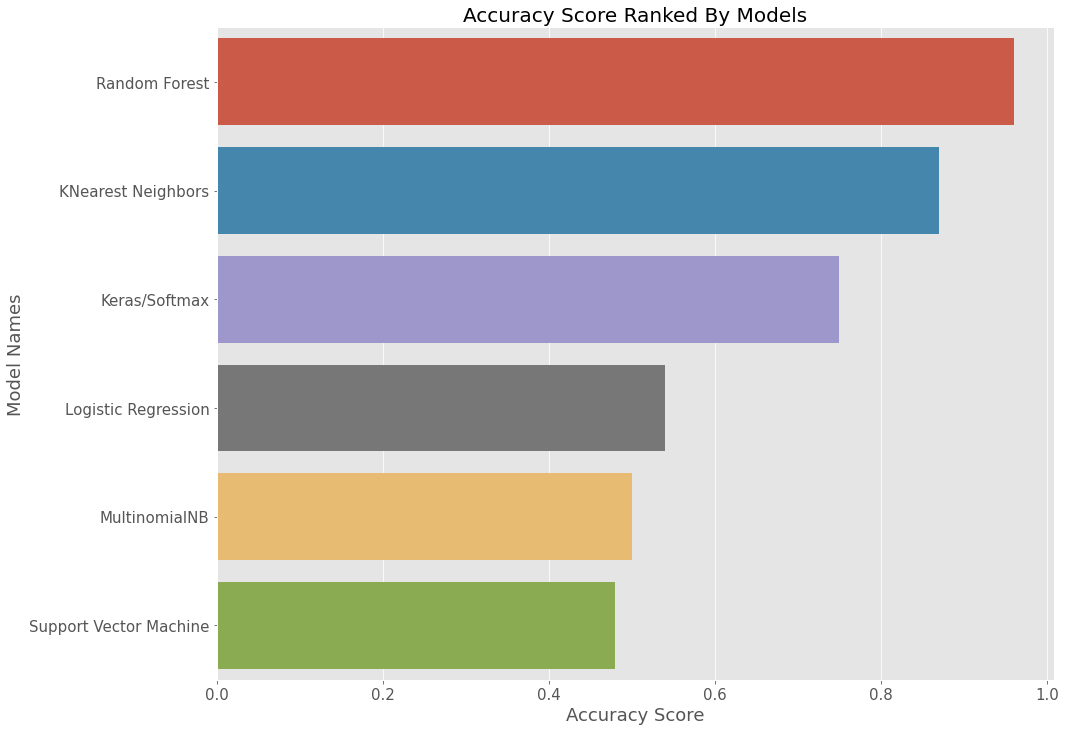

In [118]:
# visualise

order = accuracy_score.sort_values('accuracy_score', ascending=False).model_names
sns.barplot(data=accuracy_score, x='accuracy_score', y='model_names', order=order);
plt.title('Accuracy Score Ranked By Models', fontsize=20);
plt.xlabel('Accuracy Score');
plt.ylabel('Model Names');

In [119]:
# testing....

john = (X.loc[3,:]) 
sally = (X.loc[79,:])
sam = (X.loc[888,:])
jude = (X.loc[945,:])
ken = (X.loc[300,:])
tom = (X.loc[903,:])
nancy = X.loc[7,:]

In [120]:
def premiumprice_3(model,X,y,x_input):
    x_input = x_input.values.reshape(-1,X_cl.shape[1])
    model.fit(X,y)
    y_pred = model.predict(x_input)
    
    if y_pred == 0:
        print(f"Premium price: {df.loc[0,'mean']}")
        print(f"Lower limit: {df.loc[0,'min']}")
        print(f"Upper limit: {df.loc[0,'max']}")
        
    elif y_pred == 1:
        print(f"Premium price: {df.loc[1,'mean']}")
        print(f"Lower limit: {df.loc[1,'min']}")
        print(f"Upper limit: {df.loc[1,'max']}")
    
    elif y_pred == 2:
        print(f"Premium price: {df.loc[2,'mean']}")
        print(f"Lower limit: {df.loc[2,'min']}")
        print(f"Upper limit: {df.loc[2,'max']}")
        
    elif y_pred == 3:
        print(f"Premium price: {df.loc[3,'mean']}")
        print(f"Lower limit: {df.loc[3,'min']}")
        print(f"Upper limit: {df.loc[3,'max']}")
        
    elif y_pred == 4:
        print(f"Premium price: {df.loc[4,'mean']}")
        print(f"Lower limit: {df.loc[4,'min']}")
        print(f"Upper limit: {df.loc[4,'max']}")
        
    elif y_pred == 5:
        print(f"Premium price: {df.loc[5,'mean']}")
        print(f"Lower limit: {df.loc[5,'min']}")
        print(f"Upper limit: {df.loc[5,'max']}")
        
    elif y_pred == 6:
        print(f"Premium price: {df.loc[6,'mean']}")
        print(f"Lower limit: {df.loc[6,'min']}")
        print(f"Upper limit: {df.loc[6,'max']}")
        
    elif y_pred == 7:
        print(f"Premium price: {df.loc[7,'mean']}")
        print(f"Lower limit: {df.loc[7,'min']}")
        print(f"Upper limit: {df.loc[7,'max']}")
        
    elif y_pred == 8:
        print(f"Premium price: {df.loc[8,'mean']}")
        print(f"Lower limit: {df.loc[8,'min']}")
        print(f"Upper limit: {df.loc[8,'max']}")
        
    elif y_pred == 9:
        print(f"Premium price: {df.loc[9,'mean']}")
        print(f"Lower limit: {df.loc[9,'min']}")
        print(f"Upper limit: {df.loc[9,'max']}")

        

In [121]:
premiumprice_3(rfc,X_cl,y_cl, nancy)

Premium price: 270
Lower limit: 270
Upper limit: 270


In [122]:
# define classification model for price prediction

def premiumprice_model_3(model, X,y, x_input):

    x_input = x_input.values.reshape(-1,X.shape[1])
    model.fit(X,y)
    y_pred = model.predict(x_input)
    
    if y_pred == 0:
        return df.loc[0,'mean']
    elif y_pred == 1:
        return df.loc[1,'mean']
    elif y_pred == 2:
        return df.loc[2,'mean']
    elif y_pred == 3:
        return df.loc[3,'mean']
    elif y_pred == 4:
        return df.loc[4,'mean']  
    elif y_pred == 5:
        return df.loc[5,'mean']
    elif y_pred == 6:
        return df.loc[6,'mean']
    elif y_pred == 7:
        return df.loc[7,'mean']
    elif y_pred == 8:
        return df.loc[8,'mean']
    elif y_pred == 9:
        return df.loc[9,'mean']
    else:
        return np.nan

# Use RandomForest and KNearest Neighbors as price predictors

In [123]:
# assign price to new column

acc = []

for i in range(X.shape[0]):
    acc.append(premiumprice_model_3(knn, X_cl,y_cl, X.loc[i,:]))

data['price_model_knn'] = acc

In [124]:
# assign price to new column

acc = []

for i in range(X.shape[0]):
    acc.append(premiumprice_model_3(rfc, X_cl,y_cl, X.loc[i,:]))

data['price_model_randomforest'] = acc

In [125]:
data.head()

,age,diabetes,bloodpressureproblems,anytransplants,anychronicdiseases,height,weight,knownallergies,historyofcancerinfamily,numberofmajorsurgeries,premiumprice,bmi,weight_status,price_model_linear,price_model_linear_weighted,price_model_class,price_model_knn,price_model_randomforest
0,45,0,0,0,0,1.55,57,0,0,0,449,23.725286,0,431,431,4,449,449
1,60,1,0,0,0,1.80,73,0,0,0,522,22.530864,0,507,526,6,535,535
2,36,1,1,0,0,1.58,59,0,0,1,413,23.634033,0,367,367,3,412,412
3,52,1,1,0,1,1.83,93,0,0,2,503,27.770313,0,510,510,5,502,502
4,38,0,0,0,1,1.66,88,0,0,1,413,31.934969,0,448,448,3,412,412


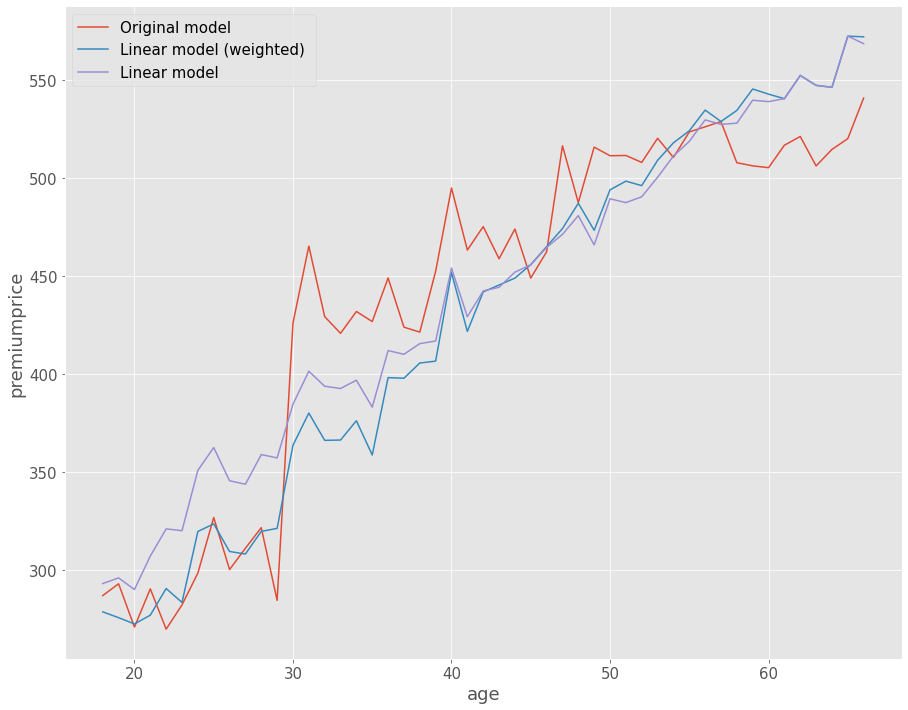

In [126]:
# model 3 follows closely behind Original model which was computed manually, model 2 is a new linear model

sns.lineplot(data=data, x='age', y='premiumprice', palette='bright', ci=None)
sns.lineplot(data=data, x='age', y='price_model_linear_weighted', palette='bright',ci=None)
#sns.lineplot(data=data, x='age', y='price_model_knn', palette='bright', ci=None)
sns.lineplot(data=data, x='age', y='price_model_linear', palette='bright',ci=None )
#sns.lineplot(data=data, x='age', y='price_model_randomforest', palette='bright', ci=None)
plt.legend(['Original model','Linear model (weighted) ','Linear model'])
plt.show()

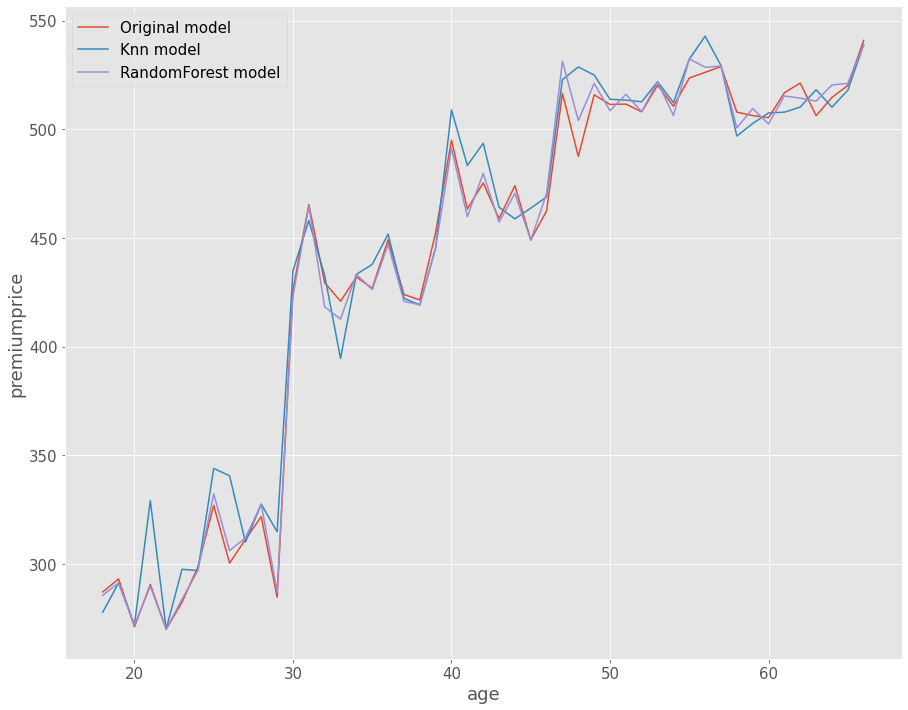

In [127]:
# model 3 follows closely behind Original model which was computed manually, model 2 is a new linear model

sns.lineplot(data=data, x='age', y='premiumprice', palette='bright', ci=None)
#sns.lineplot(data=data, x='age', y='price_model_linear', palette='bright', ci=None)
sns.lineplot(data=data, x='age', y='price_model_knn', palette='bright', ci=None)
#sns.lineplot(data=data, x='age', y='price_model_linear_no_wts', palette='bright', ci=None)
sns.lineplot(data=data, x='age', y='price_model_randomforest', palette='bright', ci=None)
plt.legend(['Original model' ,'Knn model','RandomForest model'])
plt.show()

In [128]:
data.head()

,age,diabetes,bloodpressureproblems,anytransplants,anychronicdiseases,height,weight,knownallergies,historyofcancerinfamily,numberofmajorsurgeries,premiumprice,bmi,weight_status,price_model_linear,price_model_linear_weighted,price_model_class,price_model_knn,price_model_randomforest
0,45,0,0,0,0,1.55,57,0,0,0,449,23.725286,0,431,431,4,449,449
1,60,1,0,0,0,1.80,73,0,0,0,522,22.530864,0,507,526,6,535,535
2,36,1,1,0,0,1.58,59,0,0,1,413,23.634033,0,367,367,3,412,412
3,52,1,1,0,1,1.83,93,0,0,2,503,27.770313,0,510,510,5,502,502
4,38,0,0,0,1,1.66,88,0,0,1,413,31.934969,0,448,448,3,412,412


In [131]:
# total sales forecast

summation = []
price_models = ['premiumprice','price_model_linear','price_model_linear_weighted','price_model_knn',\
                'price_model_randomforest']
for models in price_models:
    a = data[models].sum()
    b = round(data[models].mean(),0)
    c = round(data[models].std(),0)
    cast = {'model_name': models, 'sales_forecast': a, 'average_price': b, 'standard_deviation': c}
    summation.append(cast)
    
sales_forecast = pd.DataFrame(data=summation, columns=['model_name','sales_forecast','average_price','standard_deviation'])
sales_forecast

,model_name,sales_forecast,average_price,standard_deviation
0,premiumprice,431405,438.0,112.0
1,price_model_linear,431464,438.0,90.0
2,price_model_linear_weighted,421791,428.0,104.0
3,price_model_knn,436354,443.0,116.0
4,price_model_randomforest,431960,438.0,113.0


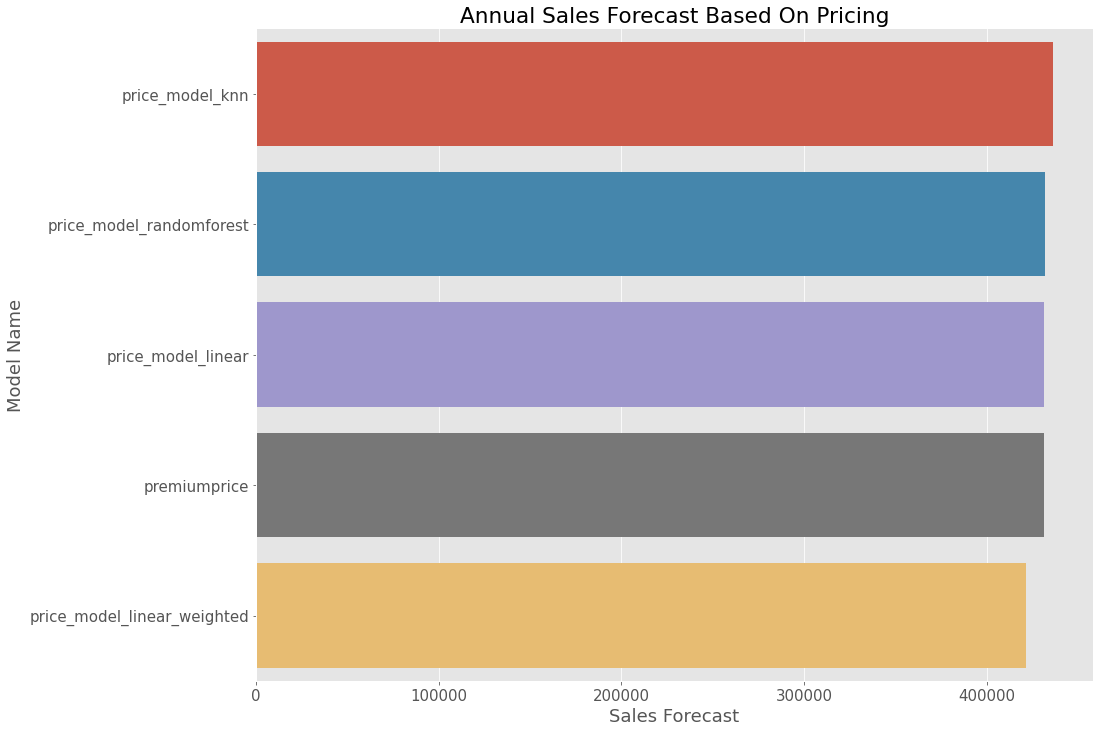

In [132]:
order = sales_forecast.sort_values('sales_forecast', ascending=False).model_name
sns.barplot(data=sales_forecast, x='sales_forecast', y='model_name', order=order);
plt.xlabel('Sales Forecast');
plt.ylabel('Model Name');
plt.title('Annual Sales Forecast Based On Pricing');

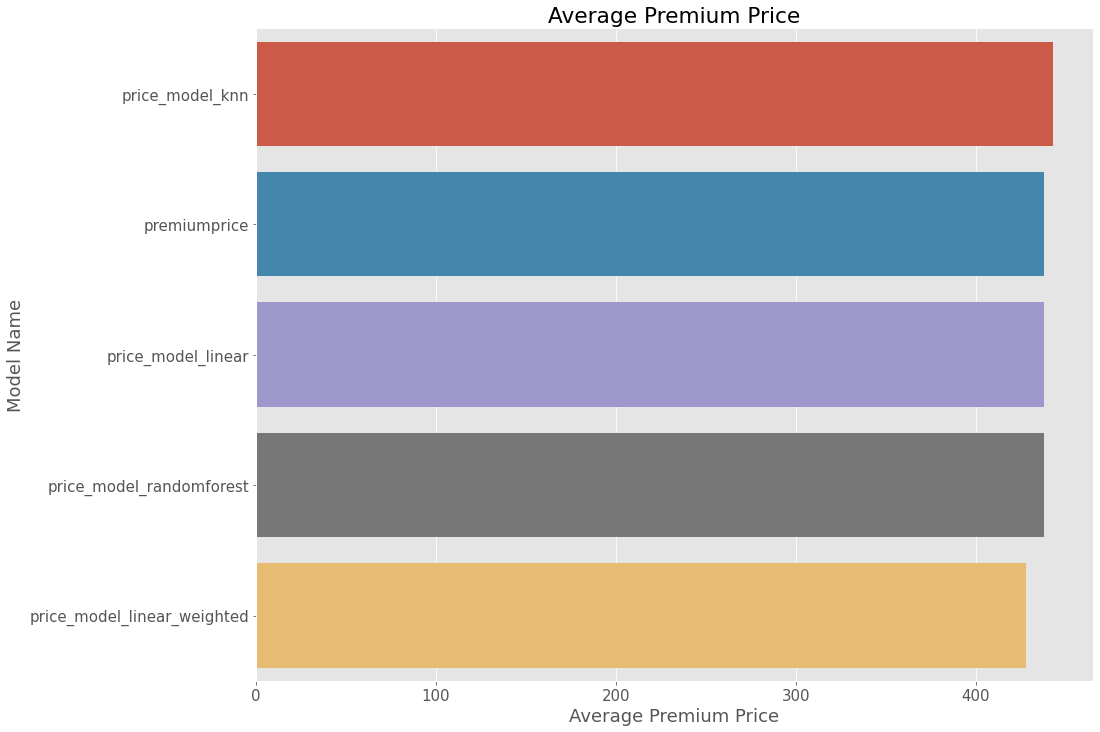

In [133]:
order = sales_forecast.sort_values('average_price', ascending=False).model_name
sns.barplot(data=sales_forecast, x='average_price', y='model_name', order=order);
plt.xlabel('Average Premium Price');
plt.ylabel('Model Name');
plt.title('Average Premium Price');

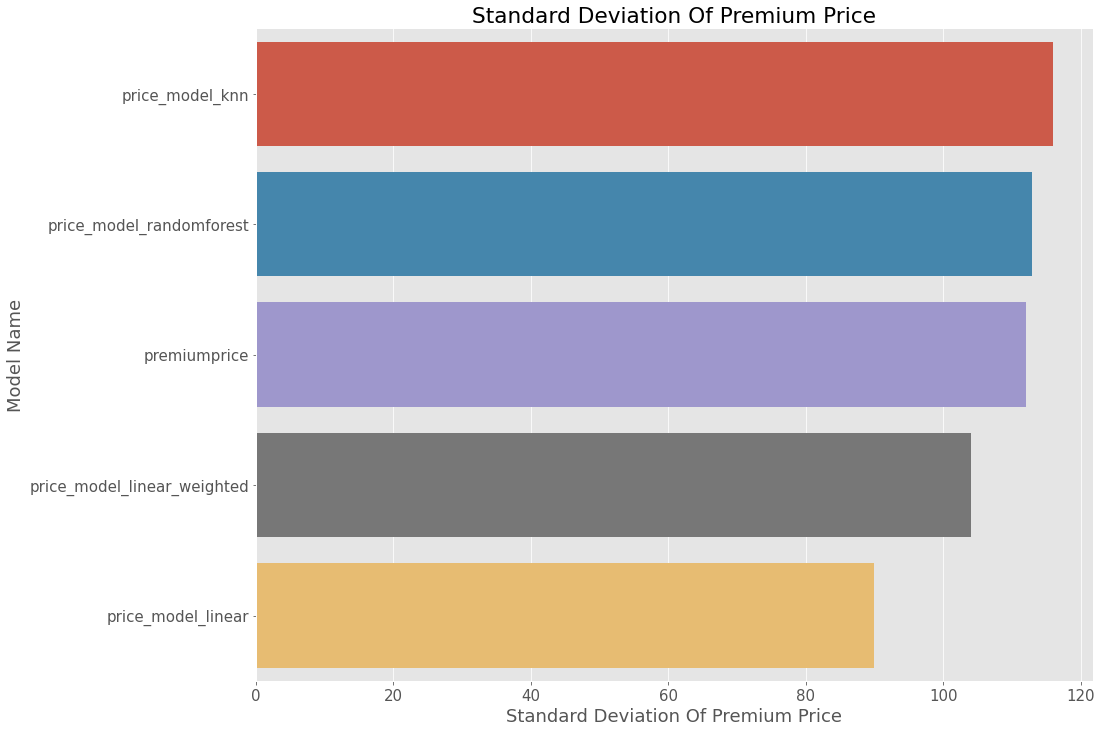

In [134]:
order = sales_forecast.sort_values('standard_deviation', ascending=False).model_name
sns.barplot(data=sales_forecast, x='standard_deviation', y='model_name', order=order);
plt.xlabel('Standard Deviation Of Premium Price');
plt.ylabel('Model Name');
plt.title('Standard Deviation Of Premium Price');